In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import PowerTransformer


In [4]:
df=pd.read_csv('BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [5]:
df.shape

(1372, 5)

In [6]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [9]:
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

<AxesSubplot:>

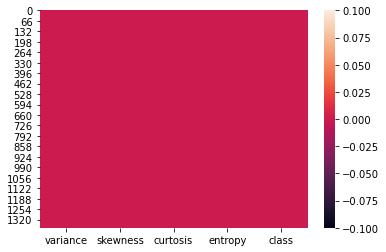

In [10]:
sns.heatmap(df.isnull())

In [12]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


<AxesSubplot:>

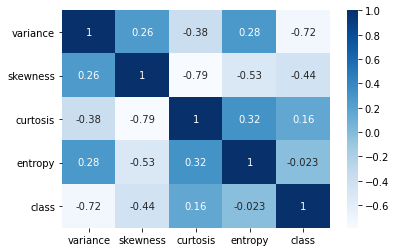

In [14]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')

##cmap=blues,virdis,plasma,inferno,magmA,CIVDIS

<AxesSubplot:xlabel='class', ylabel='count'>

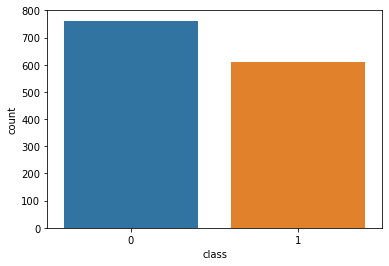

In [16]:
sns.countplot(df['class'])

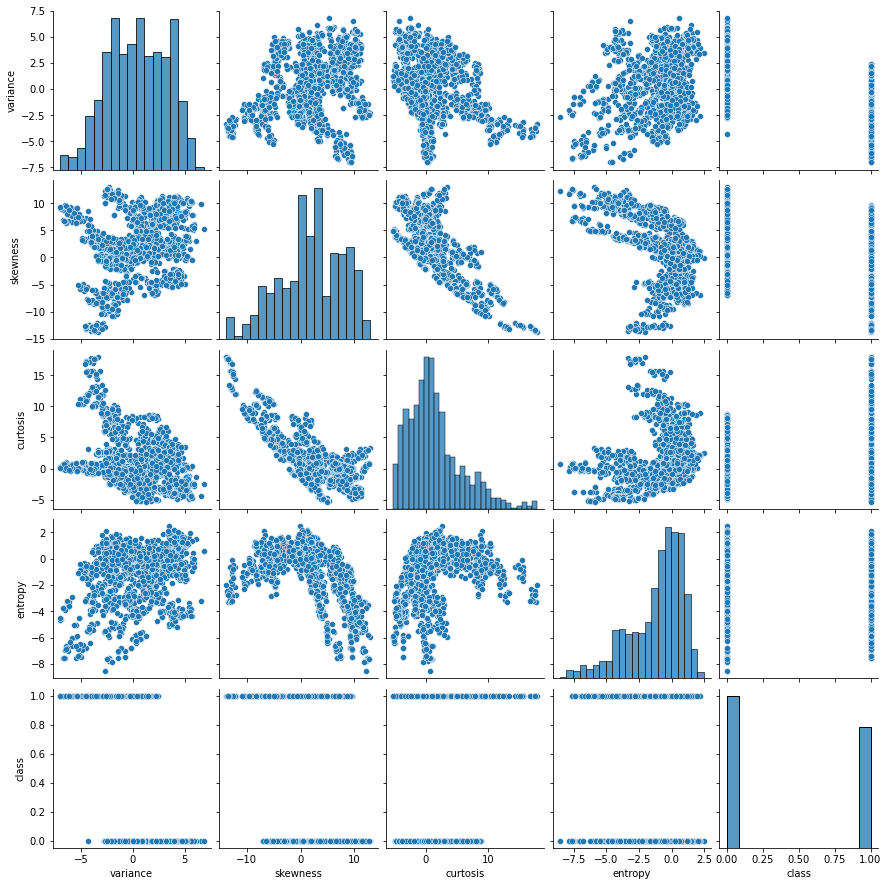

In [17]:
sns.pairplot(df)

In [18]:
df.skew()

variance   -0.149388
skewness   -0.394103
curtosis    1.088569
entropy    -1.022243
class       0.223191
dtype: float64

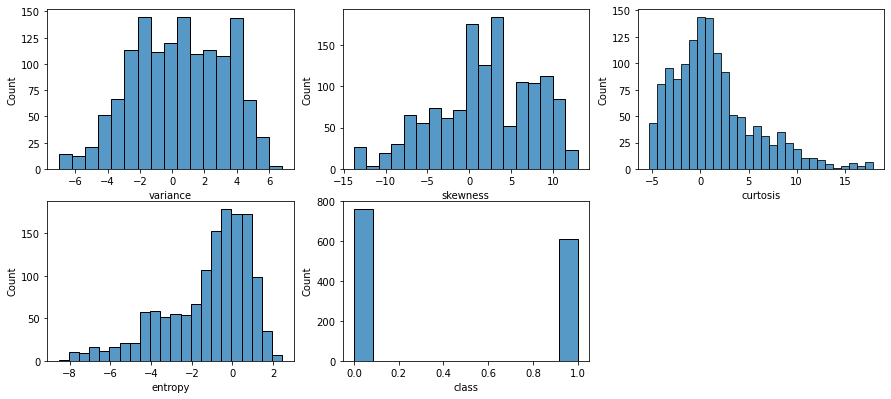

In [15]:
plt.figure(figsize=(15,10))
plot=1
for col in df.columns:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.histplot(df[col])
    plot+=1
plt.show()    

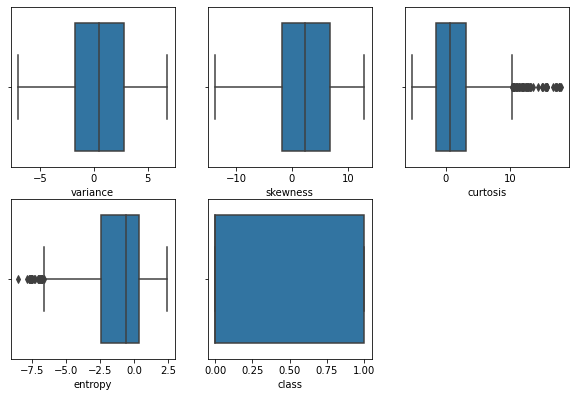

In [23]:
plt.figure(figsize=(10,10))
plot=1
for col in df.columns:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.boxplot(df[col])
    plot+=1
plt.show()

In [24]:
## removing outliers
zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [25]:
zscr[194][3]

3.0434241775405813

In [28]:
##Let's Check the  presence of outliers
print('shape before removing the outliers:',df.shape)

df_new=df[(zscr<3).all(axis=1)]

print('shape after removing the outliers:',df_new.shape)

shape before removing the outliers: (1372, 5)
shape after removing the outliers: (1336, 5)


In [29]:
df=df_new

In [30]:
## Lets divide the row dataset input and output datasets
df_x=df.drop('class',axis=1)
y=df[['class']]

In [32]:
for i in df_x.columns:
    if df_x[i].skew()>0.5:
        df_x[i]=np.cbrt(df_x[i])
    if df_x[i].skew()<-0.5:
        df_x[i]=np.cbrt(df_x[i])

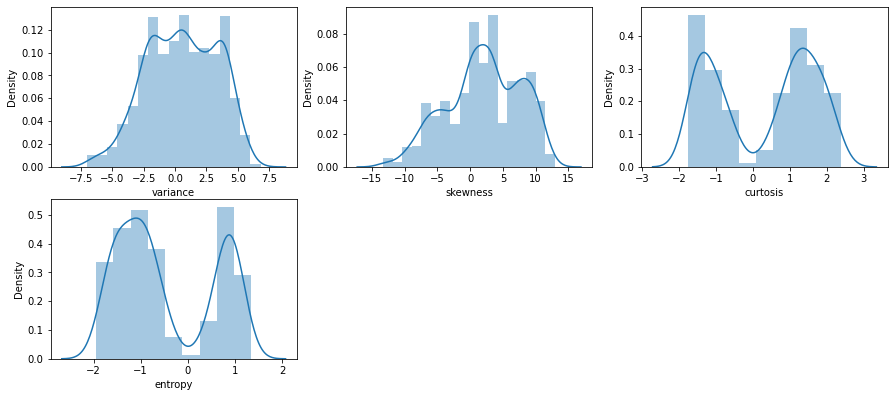

In [33]:
plt.figure(figsize=(15,10))
plot=1
for col in df_x.columns:
    if plot<=9:
        plt.subplot(3,3,plot)
        sns.distplot(df_x[col])
    plot+=1
plt.show()  

In [35]:
### let's bring all the features to comman scale
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)

x=pd.DataFrame(x,columns=df_x.columns)
x

,variance,skewness,curtosis,entropy
0,1.103540,1.186418,-1.238451,-0.308941
1,1.434725,1.097028,-1.193664,-0.672026
2,1.191111,-0.839847,0.710251,0.905149
3,1.044419,1.339977,-1.369269,-1.061029
4,-0.076142,-1.165518,1.015570,-0.536026
...,...,...,...,...
1331,-1.057636,0.304027,-0.744713,-0.627998
1332,-0.048588,-0.125105,-1.033774,-0.367179
1333,-0.691695,-1.241178,1.165618,1.125950
1334,-1.471016,-1.869505,1.496017,-0.624411


In [37]:
x.shape,y.shape

((1336, 4), (1336, 1))

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1042, 4)
(294, 4)
(1042, 1)
(294, 1)


In [39]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9863945578231292
[[162   3]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       165
           1       0.98      0.99      0.98       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [42]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.891156462585034
[[151  14]
 [ 18 111]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       165
           1       0.89      0.86      0.87       129

    accuracy                           0.89       294
   macro avg       0.89      0.89      0.89       294
weighted avg       0.89      0.89      0.89       294



In [43]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
1.0
[[165   0]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [44]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9897959183673469
[[162   3]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       165
           1       0.98      1.00      0.99       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294



In [45]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

accuracy score:
0.9965986394557823
[[164   1]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       165
           1       0.99      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294



In [46]:
## cross Val
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

[0.99253731 0.99625468 0.99250936 0.99625468 0.99625468]
0.9947621443345073


In [49]:
#Saving Model
import pickle
file='banknote_rf.pkl'
pickle.dump(rf,open(file,'wb'))

In [53]:
##### Other Method
model=[lg,svc,gnb,rf,ad]

for m in model:
    m.fit(x_train,y_train)
    
    pred=m.predict(x_test)
    print('---'*15)
    print('accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())

---------------------------------------------
accuracy score of LogisticRegression()
0.9863945578231292
[[162   3]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       165
           1       0.98      0.99      0.98       129

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

[0.99626866 0.98876404 0.98501873 0.99625468 0.99250936]
0.9917630946391636
---------------------------------------------
accuracy score of SVC()
1.0
[[165   0]
 [  0 129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00       129

    accuracy                           1.00       294
   macro avg       1.00      1.00      1.00       294
weighted avg       1.00      1.00      1.00       294

[1.         1.         0.99625468 1.         1